In [1]:
import pandas as pd
import numpy as np

In [2]:
vals = []
for idx,kind in enumerate(["h", "l", "e"]):
    
    df = pd.read_csv(f"Mutual_Information/mi_new_set_{kind}.txt", header=None)
    df.to_csv(f"avg_deeplift_attributions/Mutual_Information_attr_class_{idx}.csv", header=None, index=None)
    vals.append(df.values.tolist())

pd.DataFrame(np.array(vals).mean(0)).to_csv(f"avg_deeplift_attributions/Mutual_Information_attr_avg.csv", header=None, index=None)

In [3]:
vals = []
V = pd.read_csv("Linear_Regressor/coef3.out", sep=" ", header=None).values[:,:-1]
for idx, v in enumerate(V):
    
    v  = np.mean(np.reshape(v, (-1,20)), axis=1)
    df = pd.DataFrame(v)
    df.to_csv(f"avg_deeplift_attributions/Linear_Regressor_attr_class_{idx}.csv", header=None, index=None)
    vals.append(df.values.tolist())

pd.DataFrame(np.array(vals).mean(0)).to_csv(f"avg_deeplift_attributions/Linear_Regressor_attr_avg.csv", header=None, index=None)

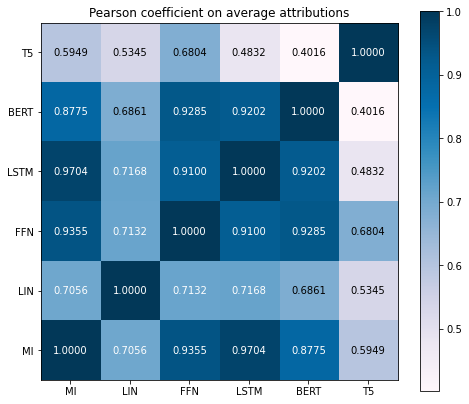

In [6]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

mutual_info    = pd.read_csv("avg_deeplift_attributions/Mutual_Information_attr_avg.csv", header=None).values[:,0]
avg_att_reg    = pd.read_csv("avg_deeplift_attributions/Linear_Regressor_attr_avg.csv", header=None).values[:,0]
avg_att_linear = pd.read_csv("avg_deeplift_attributions/FFN_Model_attr_avg.csv", header=None).values[:,0]
avg_att_lstm   = pd.read_csv("avg_deeplift_attributions/LSTM_Model_attr_avg.csv", header=None).values[:,0]
avg_att_bert   = pd.read_csv("avg_deeplift_attributions/BERT_Model_attr_avg.csv", header=None).values[:,0]
avg_att_t5     = pd.read_csv("avg_deeplift_attributions/T5_Model_attr_avg.csv", header=None).values[:,0]

model_names = ["MI", "LIN", "FFN", "LSTM", "BERT", "T5"]
all_models = [avg_att_reg, avg_att_linear, avg_att_lstm, avg_att_bert, avg_att_t5, mutual_info]


M = []
for x,model_x in enumerate(all_models):
    
    row = []
    
    for y,model_y in enumerate(all_models[::-1]):
        
        corr, _ = pearsonr(model_x, model_y)
        row.append(corr)
    
    M.append(row)

M = np.array(M)
# print(M[0,0])
plt.figure(figsize=(8,7))
heatmap = plt.imshow(M, cmap="PuBu")

plt.xticks(range(len(model_names)), model_names)
plt.yticks(range(len(model_names)), model_names[::-1])
for x in range(len(model_names)):
    for y in range(len(model_names)):

        
        perc = str(round(M[y,x],4)).ljust(6,'0')[2:]
        perc = "0."+perc if perc != "0000" else "1.0000"
        
        plt.text(
            x,y,
            f"{perc}",
            ha="center",
            va="center",
            c="w" if M[y,x]>.70 else "k"
        )
        
model_type = "Pearson_coeff"
plt.colorbar(heatmap)
plt.title("Pearson coefficient on average attributions")
plt.savefig(f"plots/{model_type}_avg.pdf", dpi=300)
plt.show()


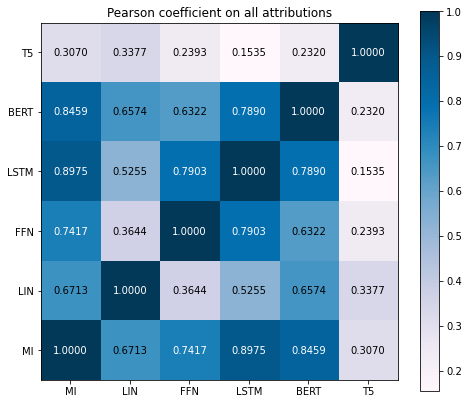

In [7]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr


mutual_info    = []
avg_att_reg    = []
avg_att_linear = []
avg_att_lstm   = []
avg_att_bert   = []
avg_att_t5     = []

for c in range(3):

    mutual_info    += pd.read_csv(f"avg_deeplift_attributions/Mutual_Information_attr_class_{c}.csv", header=None).values[:,0].tolist()
    avg_att_reg    += pd.read_csv(f"avg_deeplift_attributions/Linear_Regressor_attr_class_{c}.csv", header=None).values[:,0].tolist()
    avg_att_linear += pd.read_csv(f"avg_deeplift_attributions/FFN_Model_attr_class_{c}.csv", header=None).values[:,0].tolist()
    avg_att_lstm   += pd.read_csv(f"avg_deeplift_attributions/LSTM_Model_attr_class_{c}.csv", header=None).values[:,0].tolist()
    avg_att_bert   += pd.read_csv(f"avg_deeplift_attributions/BERT_Model_attr_class_{c}.csv", header=None).values[:,0].tolist()
    avg_att_t5     += pd.read_csv(f"avg_deeplift_attributions/T5_Model_attr_class_{c}.csv", header=None).values[:,0].tolist()

model_names = ["MI", "LIN", "FFN", "LSTM", "BERT", "T5"]
all_models = [avg_att_reg, avg_att_linear, avg_att_lstm, avg_att_bert, avg_att_t5, mutual_info]


M = []
for x,model_x in enumerate(all_models):
    
    row = []
    
    for y,model_y in enumerate(all_models[::-1]):
        
        corr, _ = pearsonr(model_x, model_y)
        row.append(corr)
    
    M.append(row)

M = np.array(M)
# print(M[0,0])
plt.figure(figsize=(8,7))
heatmap = plt.imshow(M, cmap="PuBu")

plt.xticks(range(len(model_names)), model_names)
plt.yticks(range(len(model_names)), model_names[::-1])
for x in range(len(model_names)):
    for y in range(len(model_names)):

        
        perc = str(round(M[y,x],4)).ljust(6,'0')[2:]
        perc = "0."+perc if perc != "0000" else "1.0000"
        
        plt.text(
            x,y,
            f"{perc}",
            ha="center",
            va="center",
            c="w" if M[y,x]>.70 else "k"
        )
        
model_type = "Pearson_coeff"
plt.colorbar(heatmap)
plt.title("Pearson coefficient on all attributions")
plt.savefig(f"plots/{model_type}_all.pdf", dpi=300)
plt.show()

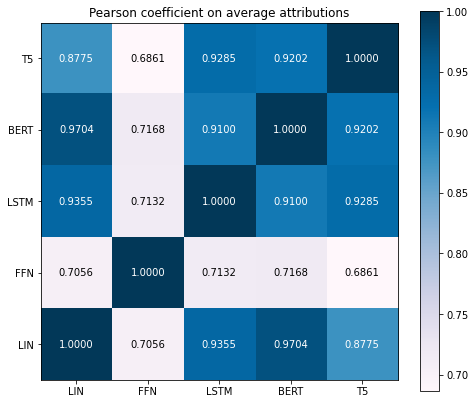

In [13]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

mutual_info    = pd.read_csv("avg_deeplift_attributions/Mutual_Information_attr_avg.csv", header=None).values[:,0]
avg_att_reg    = pd.read_csv("avg_deeplift_attributions/Linear_Regressor_attr_avg.csv", header=None).values[:,0]
avg_att_linear = pd.read_csv("avg_deeplift_attributions/FFN_Model_attr_avg.csv", header=None).values[:,0]
avg_att_lstm   = pd.read_csv("avg_deeplift_attributions/LSTM_Model_attr_avg.csv", header=None).values[:,0]
avg_att_bert   = pd.read_csv("avg_deeplift_attributions/BERT_Model_attr_avg.csv", header=None).values[:,0]
avg_att_t5     = pd.read_csv("avg_deeplift_attributions/T5_Model_attr_avg.csv", header=None).values[:,0]

model_names = [ "LIN", "FFN", "LSTM", "BERT", "T5"]
all_models = [ avg_att_linear, avg_att_lstm, avg_att_bert, avg_att_t5, mutual_info]


M = []
for x,model_x in enumerate(all_models):
    
    row = []
    
    for y,model_y in enumerate(all_models[::-1]):
        
        corr, _ = pearsonr(model_x, model_y)
        row.append(corr)
    
    M.append(row)

M = np.array(M)
# print(M[0,0])
plt.figure(figsize=(8,7))
heatmap = plt.imshow(M, cmap="PuBu")

plt.xticks(range(len(model_names)), model_names)
plt.yticks(range(len(model_names)), model_names[::-1])
for x in range(len(model_names)):
    for y in range(len(model_names)):

        
        perc = str(round(M[y,x],4)).ljust(6,'0')[2:]
        perc = "0."+perc if perc != "0000" else "1.0000"
        
        plt.text(
            x,y,
            f"{perc}",
            ha="center",
            va="center",
            c="w" if M[y,x]>.85 else "k"
        )
        
model_type = "Pearson_coeff"
plt.colorbar(heatmap)
plt.title("Pearson coefficient on average attributions")
plt.savefig(f"plots/{model_type}_avg_no_mi.pdf", dpi=300)
plt.show()


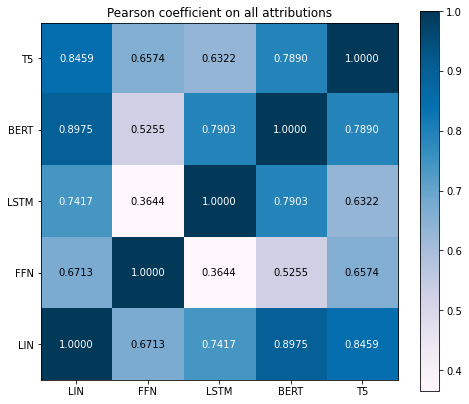

In [12]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr


mutual_info    = []
avg_att_reg    = []
avg_att_linear = []
avg_att_lstm   = []
avg_att_bert   = []
avg_att_t5     = []

for c in range(3):

    mutual_info    += pd.read_csv(f"avg_deeplift_attributions/Mutual_Information_attr_class_{c}.csv", header=None).values[:,0].tolist()
    avg_att_reg    += pd.read_csv(f"avg_deeplift_attributions/Linear_Regressor_attr_class_{c}.csv", header=None).values[:,0].tolist()
    avg_att_linear += pd.read_csv(f"avg_deeplift_attributions/FFN_Model_attr_class_{c}.csv", header=None).values[:,0].tolist()
    avg_att_lstm   += pd.read_csv(f"avg_deeplift_attributions/LSTM_Model_attr_class_{c}.csv", header=None).values[:,0].tolist()
    avg_att_bert   += pd.read_csv(f"avg_deeplift_attributions/BERT_Model_attr_class_{c}.csv", header=None).values[:,0].tolist()
    avg_att_t5     += pd.read_csv(f"avg_deeplift_attributions/T5_Model_attr_class_{c}.csv", header=None).values[:,0].tolist()

model_names = ["LIN", "FFN", "LSTM", "BERT", "T5"]
all_models = [avg_att_linear, avg_att_lstm, avg_att_bert, avg_att_t5, mutual_info]


M = []
for x,model_x in enumerate(all_models):
    
    row = []
    
    for y,model_y in enumerate(all_models[::-1]):
        
        corr, _ = pearsonr(model_x, model_y)
        row.append(corr)
    
    M.append(row)

M = np.array(M)
# print(M[0,0])
plt.figure(figsize=(8,7))
heatmap = plt.imshow(M, cmap="PuBu")

plt.xticks(range(len(model_names)), model_names)
plt.yticks(range(len(model_names)), model_names[::-1])
for x in range(len(model_names)):
    for y in range(len(model_names)):

        
        perc = str(round(M[y,x],4)).ljust(6,'0')[2:]
        perc = "0."+perc if perc != "0000" else "1.0000"
        
        plt.text(
            x,y,
            f"{perc}",
            ha="center",
            va="center",
            c="w" if M[y,x]>.70 else "k"
        )
        
model_type = "Pearson_coeff"
plt.colorbar(heatmap)
plt.title("Pearson coefficient on all attributions")
plt.savefig(f"plots/{model_type}_all_no_mi.pdf", dpi=300)
plt.show()